# Customer Purchase Analysis
## 1-Hour Lab Assignment
Target Variable: Purchase

## Part A: Data Wrangling

In [1]:
import pandas as pd
df = pd.read_csv('new_customer_purchase_dataset.csv')
df.head()

,Gender,Monthly Income,Brand Awareness,Quality Rating,Purchase
0,Female,81238,7,4,YES
1,Male,67692,4,8,YES
2,Female,32960,8,6,NO
3,Female,47218,4,8,NO
4,Male,75271,5,1,NO


In [2]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Purchase'] = df['Purchase'].map({'YES': 1, 'NO': 0})
df.isnull().sum()

Gender             0
Monthly Income     0
Brand Awareness    0
Quality Rating     0
Purchase           0
dtype: int64

In [3]:
df = df.dropna()
df.describe()

,Gender,Monthly Income,Brand Awareness,Quality Rating,Purchase
count,99.000000,99.000000,99.000000,99.00000,99.000000
mean,0.525253,63201.656566,5.616162,6.30303,0.575758
std,0.501903,16326.891932,2.418918,2.10662,0.496743
min,0.000000,30874.000000,1.000000,1.00000,0.000000
25%,0.000000,51415.500000,4.000000,5.00000,0.000000
50%,1.000000,64155.000000,6.000000,7.00000,1.000000
75%,1.000000,75392.500000,8.000000,8.00000,1.000000
max,1.000000,89866.000000,9.000000,9.00000,1.000000


## Part B: Data Visualization

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

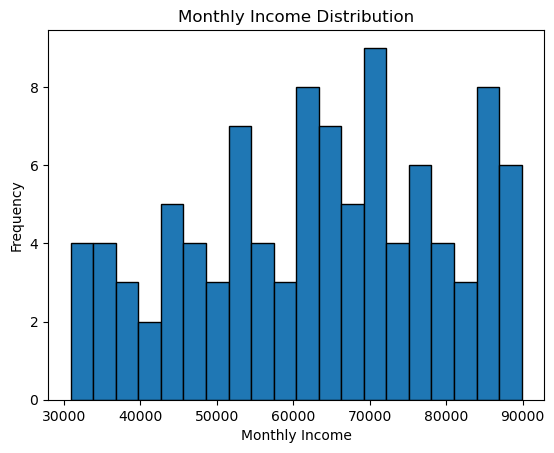

In [8]:
plt.hist(df['Monthly Income'], bins=20, edgecolor='black')
plt.title('Monthly Income Distribution')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.show()


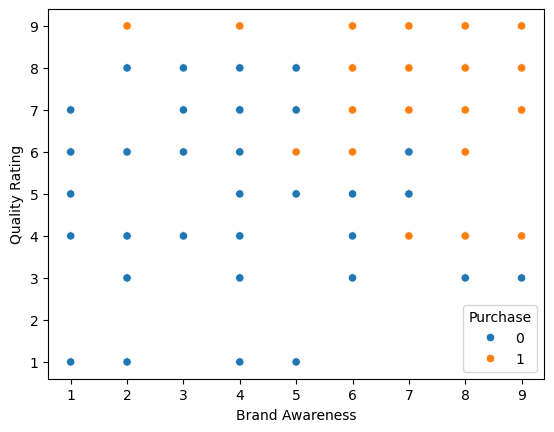

In [15]:
sns.scatterplot(
    data=df,
    x='Brand Awareness',
    y='Quality Rating',
    hue='Purchase'
)
plt.show()


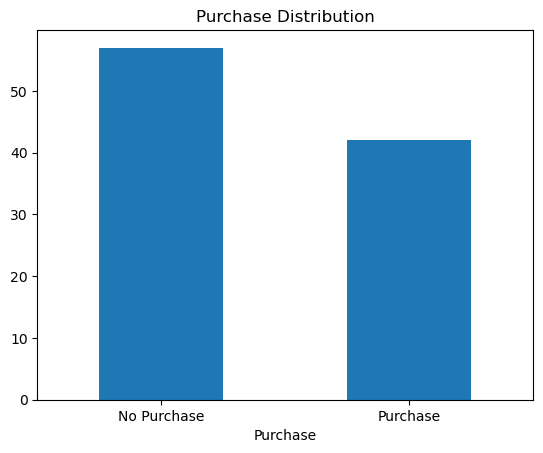

In [9]:
df['Purchase'].value_counts().plot(kind='bar')
plt.xticks([0,1], ['No Purchase', 'Purchase'], rotation=0)
plt.title('Purchase Distribution')
plt.show()

## Part C: Logistic Regression

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df.drop('Purchase', axis=1)
y = df['Purchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8333333333333334
Confusion Matrix:
 [[10  2]
 [ 3 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.88      0.83      0.86        18

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30



## Part D: Decision Tree

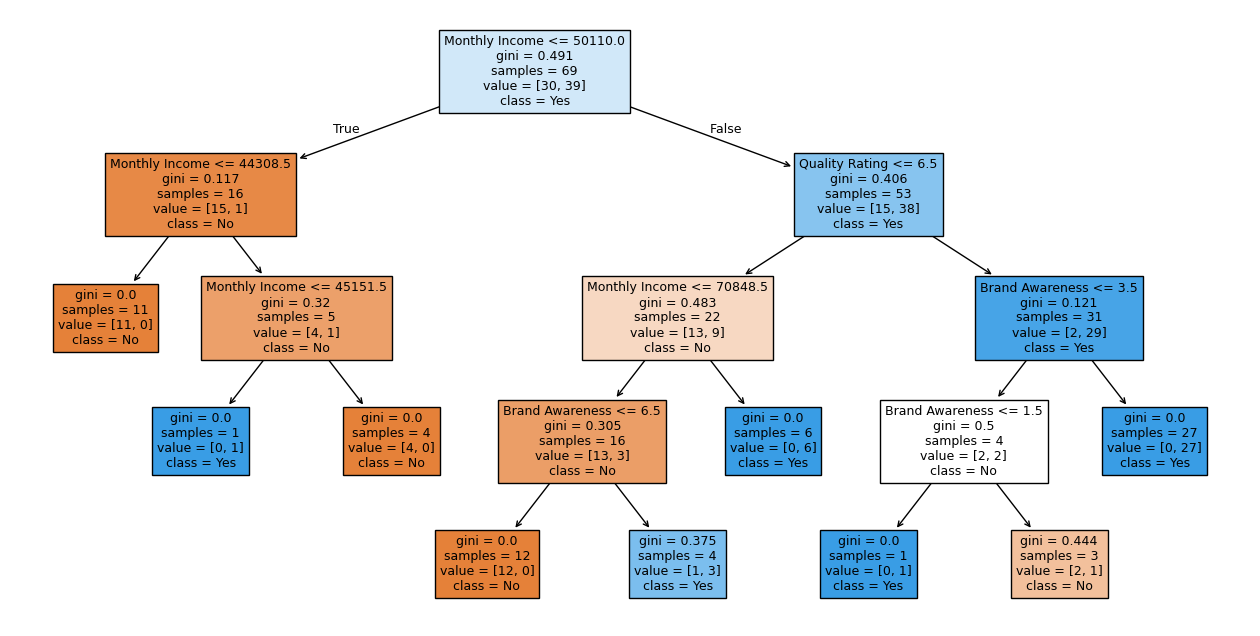

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
dt.fit(X_train, y_train)

plt.figure(figsize=(16,8))
plot_tree(dt, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

## Reflection Questions

1. Decision Trees are more interpretable because they provide clear IF–THEN rules.
2. A Decision Tree is recommended for business managers due to transparency.
3. Increasing tree depth too much causes overfitting.